# Simulated data
To review AR/MA models, this exercise will simulates data.


### ARMA Models 
Form for an AR model of order $p$:
### $$X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} \dots + \phi_p X_{t - p} + \varepsilon_t$$

Form for an MA model of order $q$:
### $$X_t = \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} \dots + \theta_q \varepsilon_{t-q}$$

where $\epsilon_t$ is mean zero white noise that's uncorrelated with any lagged or future values. 

$X_t$ is the value of the time series, and is typically the only thing you observe. 

$\phi$ and $\theta$ are parameters to be estimated. 


### Simulate Dataset
First, we simulate a dataset with random noise and AR/MA terms. 

There's some technical constraints about when an AR/MA series is stationary, and whether you can recover the MA terms from the series (invertibility) - you don't have to worry about these, but to run these simulations, I'm making sure that the time series is stationary so that the ARIMA packages can recover the parameters. 



In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
from IPython.core.pylabtools import figsize
from tensorflow.python.ops.gen_array_ops import tile_grad
from scipy.special import comb
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm

sns.set_theme()

def sim_dataset(AR, MA, t=100, trend = None, polynomial_root = -0.5, MA_weight = 0.5):
    """
    Simulates a dataset given AR or MA order.
    Selects AR terms so that the polynomial root is the given value;
    as long as the root is within (-1, 1), the series will be stationary.
    """
    if trend is None:
        trend = lambda x: 0
    arparams = np.array([comb(AR, i)*(polynomial_root)**(i) for i in range(1, AR + 1)])
    maparams = np.array([MA_weight] * MA)
    ar = np.r_[1, arparams] # add zero-lag
    ma = np.r_[1, maparams] # add zero-lag
    arma_process = sm.tsa.ArmaProcess(ar, ma)
    print("AR, MA, t, polynomial_root, MA_weight", AR, MA, t, polynomial_root, MA_weight)
    print("ARMA process is stationary: ", arma_process.isstationary)
    print("ARMA process is invertible: ", arma_process.isinvertible)
    y = arma_process.generate_sample(t)
    y = np.array([_y + trend(j) for j, _y in enumerate(y)])
    return y
def evaluate_AIC(k, residuals):
    """
    Finds the AIC given the number of parameters estimated and
    the residuals of the model. Assumes residuals are distributed
    Gaussian with unknown variance.
    """
    standard_deviation = np.std(residuals)
    log_likelihood = norm.logpdf(residuals, 0, scale=standard_deviation)
    return 2 * k - 2 * np.sum(log_likelihood)
def evaluate_BIC(k, residuals):
    """
    Finds the AIC given the number of parameters estimated and
    the residuals of the model. Assumes residuals are distributed
    Gaussian with unknown variance.
    """
    standard_deviation = np.std(residuals)
    log_likelihood = norm.logpdf(residuals, 0, scale=standard_deviation)
    return k * np.log(len(residuals)) - 2 * np.sum(log_likelihood)

#### WN, AR, MA, ARMA
WN = White Noise
- Table of comparison

    |      | White Noise | AR | MA | ARMA |
    |-----:|---------------|---------------|---------------|---------------|
    |  ACF | no clear pattern after first term | Exponentially decaying pattern | Significant terms up to the MA term, then no significant pattern |        Significant terms up to the MA term, then no significant pattern |
    | PACF | no clear pattern after first term | Significant terms up to the AR term, then no significant pattern | Exponentially decaying terms | Exponentially decaying terms |

AR, MA, t, polynomial_root, MA_weight 0 0 100 -0.5 0.5
ARMA process is stationary:  True
ARMA process is invertible:  True
AR, MA, t, polynomial_root, MA_weight 2 0 250 -0.8 0.5
ARMA process is stationary:  True
ARMA process is invertible:  True
AR, MA, t, polynomial_root, MA_weight 0 3 250 -0.5 0.9
ARMA process is stationary:  True
ARMA process is invertible:  True
AR, MA, t, polynomial_root, MA_weight 1 2 250 -0.5 0.5
ARMA process is stationary:  True
ARMA process is invertible:  True


C:\Users\chito\AppData\Local\Temp\ipykernel_24276\2395201791.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


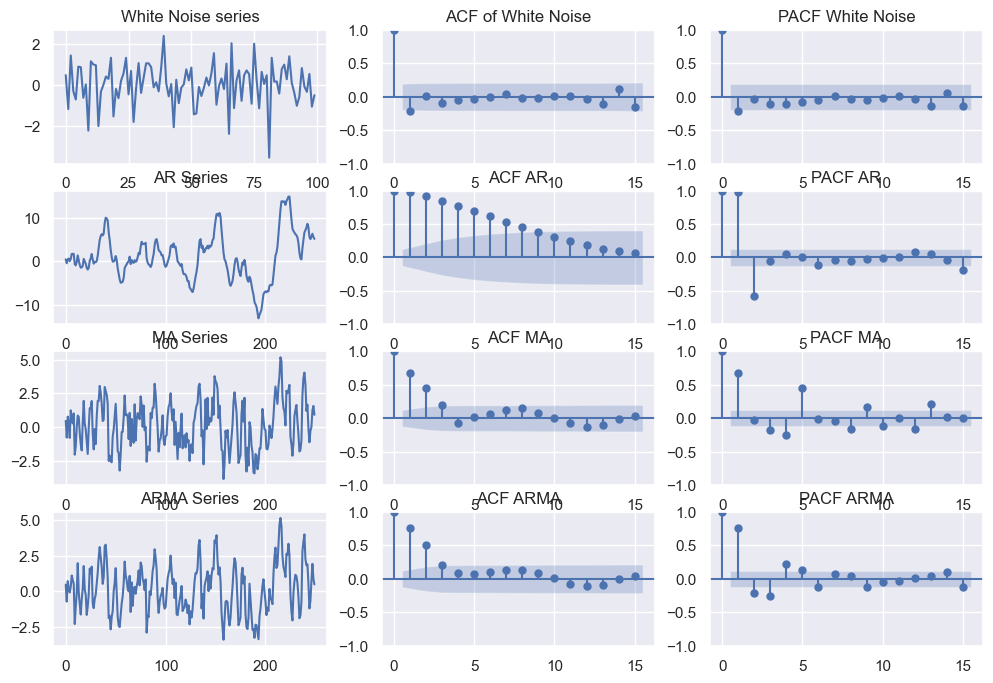

In [2]:
# Simulation of White Noise, AR, MA, ARMA time series
np.random.seed(1234)
white_noise = sim_dataset(0, 0, 100)
np.random.seed(1234)
AR_series = sim_dataset(2, 0, 250, polynomial_root = -0.8)
np.random.seed(1234)
MA_series = sim_dataset(0, 3, 250, MA_weight=0.9)
np.random.seed(1234)
ARMA_series = sim_dataset(1, 2, 250, polynomial_root = -0.5)

fig, axs = plt.subplots(4, 3,figsize=(12, 8))

axs[0, 0].plot(white_noise)
axs[0, 0].set_title("White Noise series")
sm.graphics.tsa.plot_acf(white_noise,ax=axs[0, 1], title="ACF of White Noise", lags=15)
sm.graphics.tsa.plot_pacf(white_noise,ax=axs[0, 2], title="PACF White Noise", lags=15)

axs[1, 0].plot(AR_series)
axs[1, 0].set_title("AR Series")
sm.graphics.tsa.plot_acf(AR_series,ax=axs[1, 1], title="ACF AR", lags=15)
sm.graphics.tsa.plot_pacf(AR_series,ax=axs[1, 2], title="PACF AR", lags=15)

axs[2, 0].plot(MA_series)
axs[2, 0].set_title("MA Series")
sm.graphics.tsa.plot_acf(MA_series,ax=axs[2, 1], title="ACF MA", lags=15)
sm.graphics.tsa.plot_pacf(MA_series,ax=axs[2, 2], title="PACF MA", lags=15)

axs[3, 0].plot(ARMA_series)
axs[3, 0].set_title("ARMA Series")
sm.graphics.tsa.plot_acf(ARMA_series,ax=axs[3, 1], title="ACF ARMA", lags=15)
sm.graphics.tsa.plot_pacf(ARMA_series,ax=axs[3, 2], title="PACF ARMA", lags=15)

fig.show()

- Table of comparison

    |      | White Noise | AR | MA | ARMA |
    |-----:|---------------|---------------|---------------|---------------|
    |  ACF | no clear pattern after first term | Exponentially decaying pattern | Significant terms up to the MA term, then no significant pattern |        Significant terms up to the MA term, then no significant pattern |
    | PACF | no clear pattern after first term | Significant terms up to the AR term, then no significant pattern | Exponentially decaying terms | Exponentially decaying terms |

## Interpretation:
We can recognize some features of AR/MA models from the ACF and PACF plots.

AR is easy to recognize; can be harder to interpret PACF when the sign changes between terms.

## Fitting ARIMA Models
Estimating these models can be challenging. Luckily, there are open source tools we can use to estimate AR/MA terms. 

Here, we use the ARIMA package to fit models to the data. Python has some other options, to better suit cases with periodic components. 

Estimation goal: given an order $p, q$, find estimates of $\phi$ and $\theta$

Recall the general form for an AR model of order $p$:
$$X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} \dots + \phi_p X_{t - p} + \varepsilon_t$$

And the form for an MA model of order $q$:
$$X_t = \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} \dots + \theta_q \varepsilon_{t-1}$$

where $\epsilon_t$ is mean zero white noise that's uncorrelated with any lagged or future values.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -351.516
Date:                Sun, 24 Aug 2025   AIC                            711.032
Time:                        13:35:39   BIC                            725.118
Sample:                             0   HQIC                           716.701
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2190      1.508      0.808      0.419      -1.737       4.175
ar.L1          1.5431      0.058     26.696      0.000       1.430       1.656
ar.L2         -0.5853      0.057    -10.249      0.0

C:\Users\chito\AppData\Local\Temp\ipykernel_24276\2147737028.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


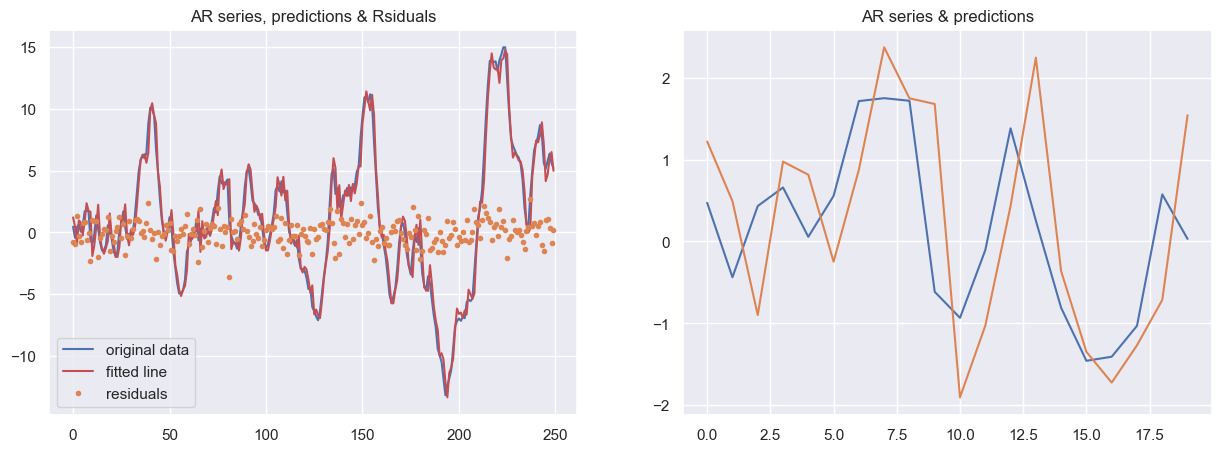

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm

AR_order = 2
# ARIMA model receives AR_series
ar_higher = ARIMA(AR_series, order=(AR_order, 0, 0)).fit()
# display the ARIMA model fit summary
print(ar_higher.summary())
# Calculate Predictions, residuals
ar_higher_predictions = ar_higher.predict()
ar_higher_residuals = AR_series - ar_higher_predictions

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(AR_series, label='original data')
axs[0].plot(ar_higher_predictions, 'r', label='fitted line')
axs[0].plot(ar_higher_residuals, '.', label='residuals')
axs[0].legend()
axs[0].set_title("AR series, predictions & Rsiduals")
axs[1].plot(AR_series[:20], label='original data')
axs[1].plot(ar_higher_predictions[:20], label='predicted data')
axs[1].set_title("AR series & predictions")
fig.show()

print("MSE with AR(1) model:", np.mean(ar_higher_residuals**2))
print("AIC with AR(1) model:", evaluate_AIC(AR_order + 1, ar_higher_residuals))
print("BIC with AR(1) model:", evaluate_BIC(AR_order + 1, ar_higher_residuals))

#### Comment on model fit
From the graph, it looks like the model fits really well - the lines are basically overlapping!

From the residuals, we still have very large magnitudes, relative to the values in the time series. What's going on?

Look more closely at the time series to get an idea of what's happening

#### Automatic AR MA params

it grid searches for best params with ARIMA model.

In [4]:
def grid_search_ARIMA(data, AR_range, MA_range, verbose=False, warning=False):
    if warning==False:
        warnings.filterwarnings("ignore")
    print("> starting grid_search_ARIMA")
    min_aic = np.inf
    min_bic = np.inf
    min_aic_index = None
    min_bic_index = None
    aic_matrix = np.zeros((len(AR_range), len(MA_range)))
    bic_matrix = np.zeros((len(AR_range), len(MA_range)))
    for AR_order in AR_range:
        for MA_order in MA_range:
            arma = ARIMA(data, order=(AR_order, 0, MA_order)).fit()
            aic_matrix[AR_order, MA_order] = arma.aic
            bic_matrix[AR_order, MA_order] = arma.bic
            if arma.aic < min_aic:
                min_aic = arma.aic
                min_aic_index = (AR_order, 0, MA_order)
            if arma.bic < min_bic:
                min_bic = arma.bic
                min_bic_index = (AR_order, 0, MA_order)
    if verbose:
        print("Minimizing AIC order: ", min_aic_index)
        print("Minimizing BIC order: ", min_bic_index )
        print("matrix of AIC", aic_matrix)
        print("Matrix of BIC", bic_matrix)
    print("... end grid_search_ARIMA")
    return min_aic_index, min_bic_index, aic_matrix, bic_matrix


> starting grid_search_ARIMA
... end grid_search_ARIMA
grid search returns best AR MA params:
(2, 0, 0) (2, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -351.516
Date:                Sun, 24 Aug 2025   AIC                            711.032
Time:                        13:35:41   BIC                            725.118
Sample:                             0   HQIC                           716.701
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2190      1.508      0.808      0.419      -1.737       4.175
ar.L1          1.

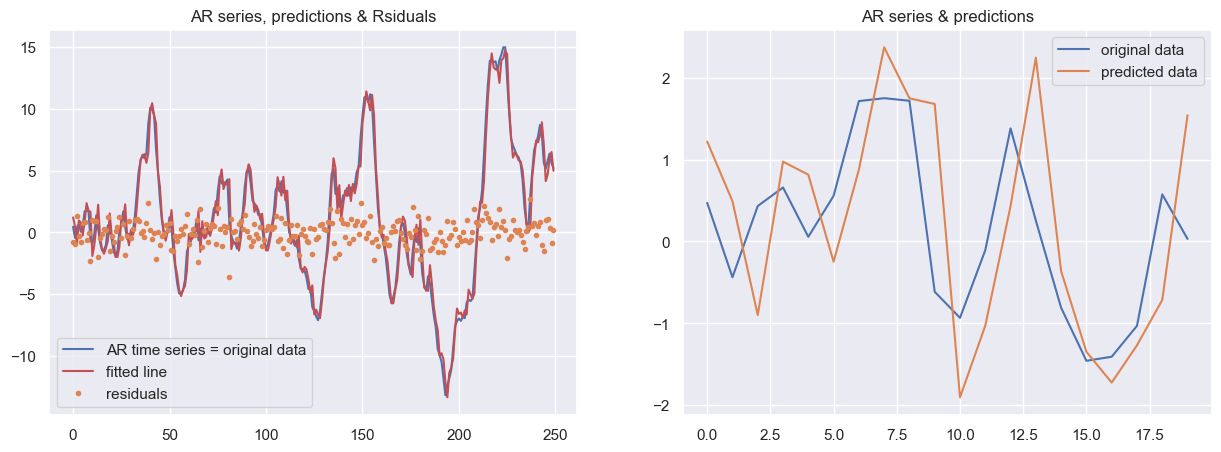

In [5]:
min_aic_index, min_bic_index, _, _ = grid_search_ARIMA(AR_series, range(4), range(4), verbose=False)
print("grid search returns best AR MA params:")
print(min_aic_index, min_bic_index)
if min_aic_index == min_bic_index:
    arma = ARIMA(AR_series, order=min_bic_index).fit()
    print(arma.summary())
    arma_predictions = arma.predict()
    arma_residuals = AR_series - arma_predictions
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(AR_series, label='AR time series = original data')
    axs[0].plot(arma_predictions, 'r', label='fitted line')
    axs[0].plot(arma_residuals, '.', label='residuals')
    axs[0].legend()
    axs[0].set_title("AR series, predictions & Rsiduals")
    axs[1].plot(AR_series[:20], label='original data')
    axs[1].plot(arma_predictions[:20], label='predicted data')
    axs[1].legend()
    axs[1].set_title("AR series & predictions")
    fig.show()
    print("Automatic selection finds model with AR {0}, MA {2}".format(*min_aic_index))
    print("MSE with selected model:", np.mean(arma_residuals**2))
else:
    print("AIC, BIC do not agree.")

> starting grid_search_ARIMA
... end grid_search_ARIMA
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -347.613
Date:                Sun, 24 Aug 2025   AIC                            705.225
Time:                        13:35:43   BIC                            722.832
Sample:                             0   HQIC                           712.312
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1558      0.252      0.619      0.536      -0.337       0.649
ma.L1          0.9240      0.034     27.047      0.000       0.857       0.9

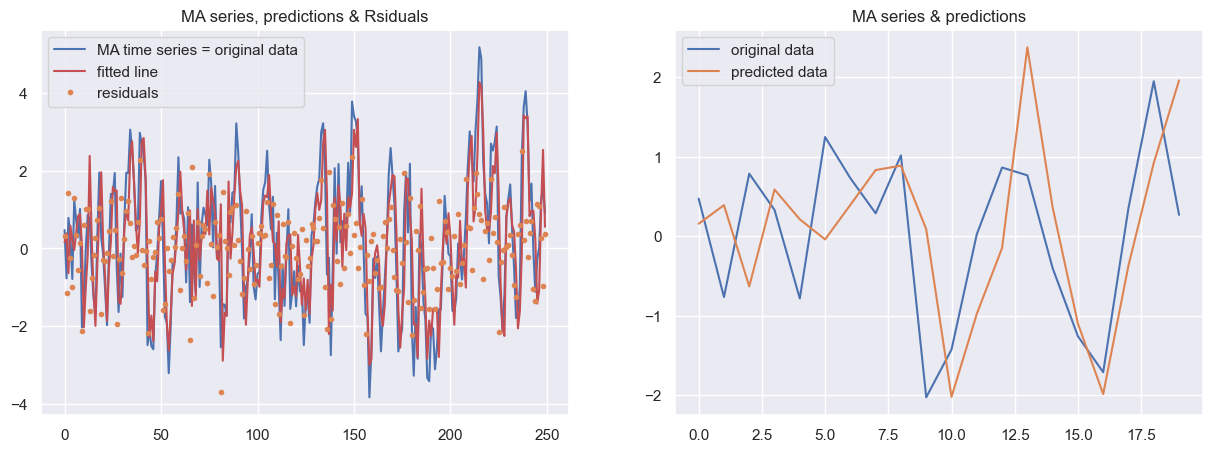

In [6]:
min_aic_index, min_bic_index, _, _ = grid_search_ARIMA(MA_series, range(4), range(4), verbose=False)
if min_aic_index == min_bic_index:
    arma = ARIMA(MA_series, order=min_bic_index).fit()
    print(arma.summary())
    arma_predictions = arma.predict()
    arma_residuals = MA_series - arma_predictions
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(MA_series, label='MA time series = original data')
    axs[0].plot(arma_predictions, 'r', label='fitted line')
    axs[0].plot(arma_residuals, '.', label='residuals')
    axs[0].legend()
    axs[0].set_title("MA series, predictions & Rsiduals")
    axs[1].plot(MA_series[:20], label='original data')
    axs[1].plot(arma_predictions[:20], label='predicted data')
    axs[1].legend()
    axs[1].set_title("MA series & predictions")
    fig.show()
    print("Automatic selection finds model with AR {0}, MA {2}".format(*min_aic_index))
    print("MSE with selected model:", np.mean(arma_residuals**2))
else:
    print("AIC, BIC do not agree.")

> starting grid_search_ARIMA
... end grid_search_ARIMA
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -349.736
Date:                Sun, 24 Aug 2025   AIC                            709.472
Time:                        13:35:44   BIC                            727.080
Sample:                             0   HQIC                           716.559
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1964      0.224      0.878      0.380      -0.242       0.635
ar.L1          0.4084      0.088      4.652      0.000       0.236       0.5

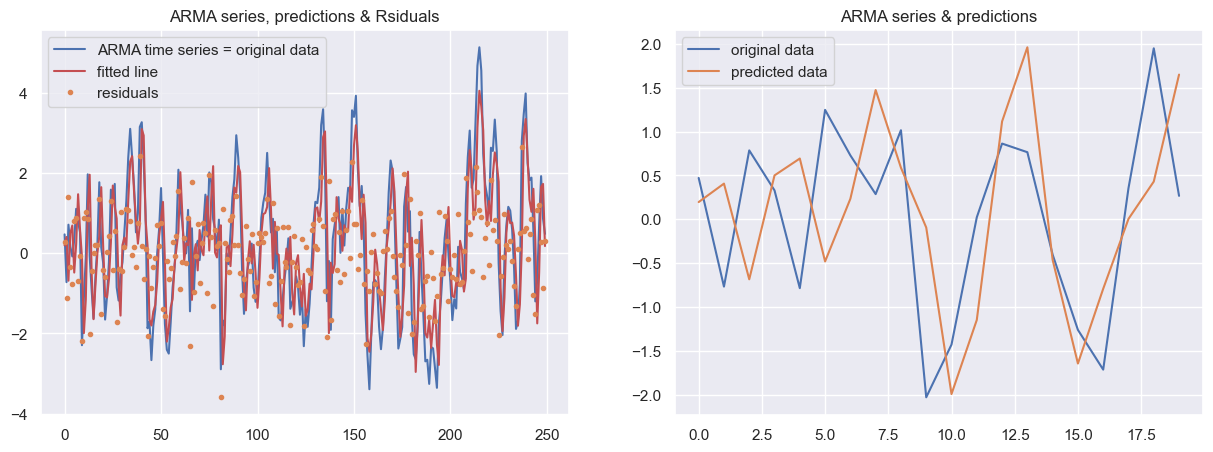

In [7]:
min_aic_index, min_bic_index, _, _ = grid_search_ARIMA(ARMA_series, range(4), range(4), verbose=False)
if min_aic_index == min_bic_index:
    arma = ARIMA(ARMA_series, order=min_bic_index).fit()
    print(arma.summary())
    arma_predictions = arma.predict()
    arma_residuals = ARMA_series - arma_predictions
    arma_residuals = arma_residuals
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(ARMA_series, label='ARMA time series = original data')
    axs[0].plot(arma_predictions, 'r', label='fitted line')
    axs[0].plot(arma_residuals, '.', label='residuals')
    axs[0].legend()
    axs[0].set_title("ARMA series, predictions & Rsiduals")
    axs[1].plot(MA_series[:20], label='original data')
    axs[1].plot(arma_predictions[:20], label='predicted data')
    axs[1].legend()
    axs[1].set_title("ARMA series & predictions")
    fig.show()
    print("Automatic selection finds model with AR {0}, MA {2}".format(*min_aic_index))
    print("MSE with selected model:", np.mean(arma_residuals**2))
else:
  print("AIC, BIC do not agree.")

#### Aside: What if AIC/BIC don't agree? 

Here's an illustration where this doesn't work - the answer is to use a more complicated tool to assess model fit, such as cross validation with a rolling forecast window. 

We won't go over this example, but it's here if you're interested. Try to play with the model settings and find what helps AIC/BIC select an appropriate model. 

We don't cover such methods in this course, but you can look up  data science blogs or textbooks for approaches to this topic. 

AR, MA, t, polynomial_root, MA_weight 2 2 250 -0.5 0.5
ARMA process is stationary:  True
ARMA process is invertible:  True
> starting grid_search_ARIMA
Minimizing AIC order:  (2, 0, 2)
Minimizing BIC order:  (1, 0, 2)
matrix of AIC [[1230.177846    992.93279633  833.45884984  743.90285356]
 [ 837.93096778  778.1142701   714.1535879   712.37826363]
 [ 744.21977832  746.18666807  712.35419478  714.31986607]
 [ 746.14838714  744.09104363  714.32068092  715.78666861]]
Matrix of BIC [[1237.22076784 1003.49717909  847.54469351  761.51015815]
 [ 848.49535054  792.20011377  731.76089249  733.50702913]
 [ 758.30562199  763.79397266  733.48296029  738.97009249]
 [ 763.75569173  765.21980914  738.97090735  743.95835596]]
... end grid_search_ARIMA
AIC, BIC do not agree.


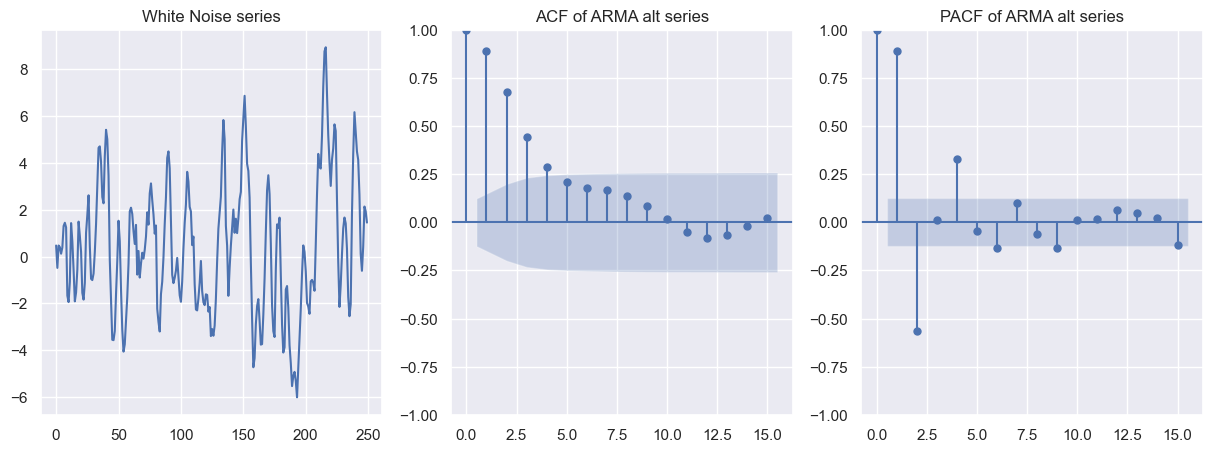

In [8]:
np.random.seed(1234)
ARMA_series_alt = sim_dataset(2, 2, 250, polynomial_root = -0.5)

fig, axs = plt.subplots(1, 3,figsize=(15, 5))
axs[0].plot(ARMA_series_alt)
axs[0].set_title("White Noise series")
sm.graphics.tsa.plot_acf(ARMA_series_alt,ax=axs[1], title="ACF of ARMA alt series", lags=15)
sm.graphics.tsa.plot_pacf(ARMA_series_alt,ax=axs[2], title="PACF of ARMA alt series", lags=15)
fig.show()

min_aic_index, min_bic_index, _, _ = grid_search_ARIMA(ARMA_series_alt, range(4), range(4), verbose=True)
if min_aic_index == min_bic_index:
    arma = ARIMA(ARMA_series, order=min_bic_index).fit()
    print(arma.summary())
    arma_predictions = arma.predict()
    arma_residuals = ARMA_series - arma_predictions
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(ARMA_series, label='ARMA time series = original data')
    axs[0].plot(arma_predictions, 'r', label='fitted line')
    axs[0].plot(arma_residuals, '.', label='residuals')
    axs[0].legend()
    axs[0].set_title("ARMA series, predictions & Rsiduals")
    axs[1].plot(MA_series[:20], label='original data')
    axs[1].plot(arma_predictions[:20], label='predicted data')
    axs[1].legend()
    axs[1].set_title("ARMA series & predictions")
    fig.show()
    print("Automatic selection finds model with AR {0}, MA {2}".format(*min_aic_index))
    print("MSE with selected model:", np.mean(arma_residuals**2))
else:
    print("AIC, BIC do not agree.")

### Recap on model fitting: 

We can use Python packages to fit ARIMA models, and our AIC/BIC procedure seems to select the correct model used to generate the time series.

What we've found is estimates of these coefficients in our AR/MA model: 
$$X_t = \hat{\phi}_1 X_{t-1} + \hat{\phi}_2 X_{t-2} \dots + \hat{\phi}_p X_{t - p} + \hat{\theta}_1 \varepsilon_{t-1} + \hat{\theta}_2 \varepsilon_{t-2} \dots + \hat{\theta}_q \varepsilon_{t-q} + \varepsilon_t $$

## Forming forecasts: 

Now that we found a model, we can form forecasts. 

With estimates of each $\theta$ and $\phi$ term, we can predict one step ahead. 

$$\hat{X}_{t + 1} = \hat{\phi}_1 X_{t} + \hat{\phi}_2 X_{t-1} \dots + \hat{\phi}_p X_{t - p + 1} + \hat{\theta}_1 \varepsilon_{t} + \hat{\theta}_2 \varepsilon_{t-1} \dots + \hat{\theta}_q \varepsilon_{t-q + 1} $$

To form long-range forecasts, we can just plug in our estimate $\hat{X}_{t + 1}$ in place of $X_{t + 1}$ at every future value, and so on for other future estimates. Let's see what happens when we do this: 



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -349.736
Date:                Sun, 24 Aug 2025   AIC                            709.472
Time:                        13:35:46   BIC                            727.080
Sample:                             0   HQIC                           716.559
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1964      0.224      0.878      0.380      -0.242       0.635
ar.L1          0.4084      0.088      4.652      0.000       0.236       0.581
ma.L1          0.5164      0.075      6.917      0.0

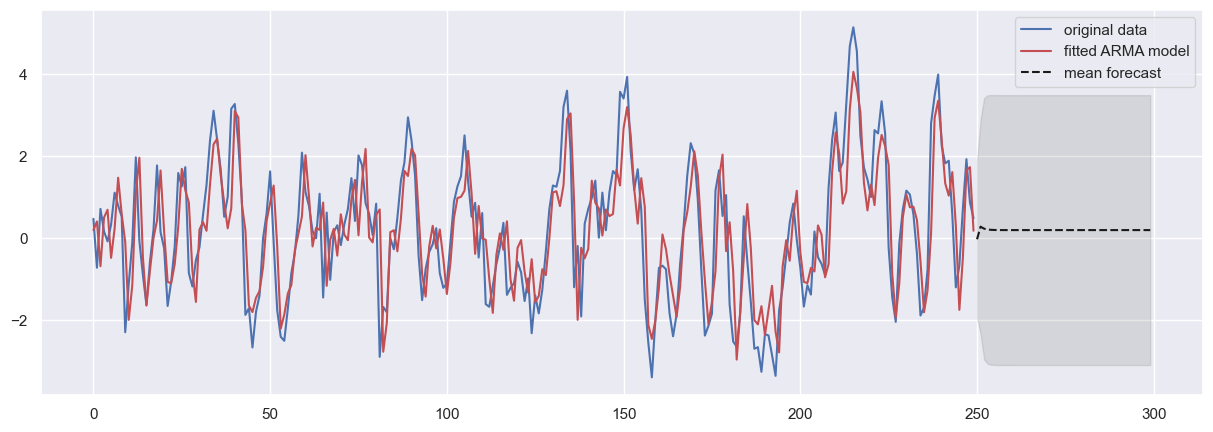

In [9]:
arma_model = ARIMA(ARMA_series, order=min_bic_index)
arma = arma_model.fit()
print(arma.summary())
arma_predictions = arma.predict()
predicted_values = arma_predictions.reshape(-1,1)
fcast = arma.get_forecast(50).summary_frame()
forecast_means = fcast['mean'].values.reshape(-1,1)
forecast_x_vals = np.arange(len(ARMA_series), len(ARMA_series) + 50)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ARMA_series, label='original data')
ax.plot(predicted_values, 'r', label='fitted ARMA model')
ax.plot(forecast_x_vals, forecast_means, 'k--', label='mean forecast')
ax.fill_between(forecast_x_vals, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);
plt.legend();

### Why do long-term predictions revert to the mean? 

Eventually, a future prediction in the time series will rely completely on predicted $X$ values. 

For any stationary time series, the long-range predictions will converge to the mean.

#### Aside: 
How are these confidence regions formed? It comes from the variability in our estimates of $\hat{\phi}$ and $\hat{\theta}$. 

It gets pretty complicated to keep track of the standard error in estimating these things - as is often the case, we're lucky to have open source tools that calculate these confidence intervals for us.